# Predicting Food Wastage at 'Globe'

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Load your data
data = pd.read_csv('Food_Wastage_sample.csv')

## Data Exploration

In [2]:
# Filter data for "Globe"
globe_data = data[data['Location'] == 'Globe']

# Visualizing the first few rows of the data
print(globe_data.head())

# Descriptive statistics
print(globe_data.describe())

    Unnamed: 0             Food Location  Week  Month  Amt_bought  \
0            0            Beans    Globe     8      2         9.0   
59          59  Parmesan cheese    Globe    11      3         5.6   
67          67            Salad    Globe     7      2         7.5   
78          78             Tune    Globe     6      2         3.7   
79          79          Chicken    Globe     3      1         5.4   

    Amt_Consumed  Wastage  
0            6.0      3.0  
59           5.4      0.2  
67           4.5      3.0  
78           0.8      2.9  
79           3.4      2.0  
        Unnamed: 0        Week       Month  Amt_bought  Amt_Consumed  \
count   508.000000  508.000000  508.000000  508.000000    508.000000   
mean   2437.338583    6.470472    2.000000    5.507874      2.850394   
std    1432.188944    3.497691    0.828487    2.538745      2.120144   
min       0.000000    1.000000    1.000000    1.000000      0.000000   
25%    1148.500000    3.000000    1.000000    3.300000   

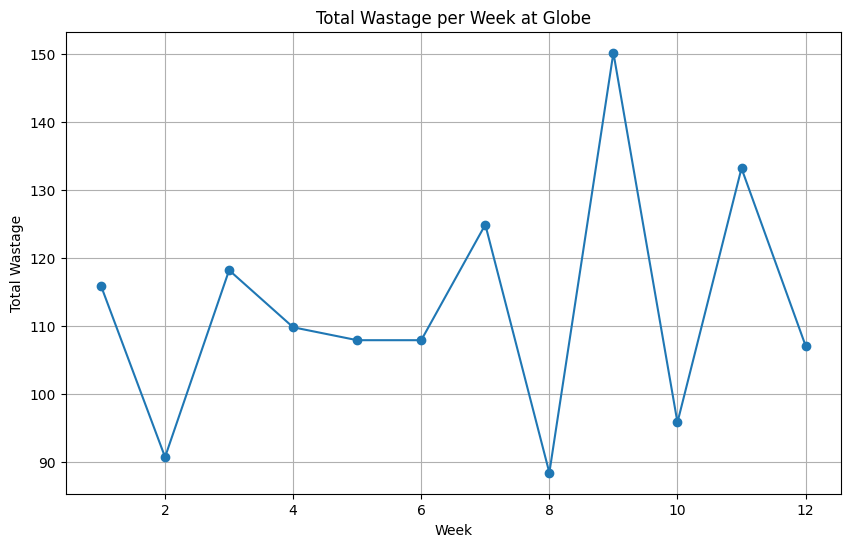

In [3]:
# Visualizing Total Wastage per Week at Globe
weekly_wastage_globe = globe_data.groupby('Week')['Wastage'].sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_wastage_globe.index, weekly_wastage_globe.values, marker='o')
plt.title('Total Wastage per Week at Globe')
plt.xlabel('Week')
plt.ylabel('Total Wastage')
plt.grid(True)
plt.show()

In [4]:
# Train a linear regression model using Amt_bought and Amt_Consumed to predict Wastage
X = globe_data[['Amt_bought', 'Amt_Consumed']]
y = globe_data['Wastage']
model = LinearRegression().fit(X, y)

# Evaluate the model on the training data
predictions_train = model.predict(X)
rmse_train = mean_squared_error(y, predictions_train, squared=False)
print(f"Training RMSE: {rmse_train}")

Training RMSE: 1.0191668312383615e-15


In [9]:
weekly_bought_consumed_globe = globe_data.groupby('Week')[['Amt_bought', 'Amt_Consumed']].sum()
X_week = weekly_bought_consumed_globe.index.values.reshape(-1, 1)

# Model for 'Amt_bought'
y_bought = weekly_bought_consumed_globe['Amt_bought']
model_bought = LinearRegression().fit(X_week, y_bought)
predicted_bought_week_13_regression = model_bought.predict([[13]])[0]

# Model for 'Amt_Consumed'
y_consumed = weekly_bought_consumed_globe['Amt_Consumed']
model_consumed = LinearRegression().fit(X_week, y_consumed)
predicted_consumed_week_13_regression = model_consumed.predict([[13]])[0]

# Using the predictions from Approach 2 to predict Wastage for week 13
predicted_values_week_13_regression = pd.DataFrame({
    'Amt_bought': [predicted_bought_week_13_regression],
    'Amt_Consumed': [predicted_consumed_week_13_regression]
})
predicted_wastage_week_13 = model.predict(predicted_values_week_13_regression)[0]

In [11]:
predicted_wastage_week_13

119.07727272727271

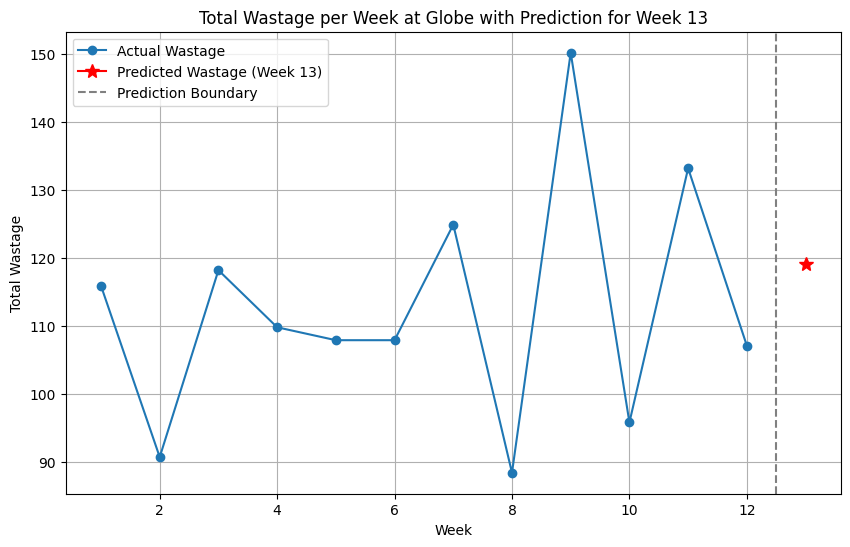

In [12]:
# Visualizing the predicted wastage for week 13 along with actual wastage
plt.figure(figsize=(10, 6))
plt.plot(weekly_wastage_globe.index, weekly_wastage_globe.values, marker='o', label='Actual Wastage')
plt.plot(13, predicted_wastage_week_13, marker='*', markersize=10, color='red', label='Predicted Wastage (Week 13)')
plt.title('Total Wastage per Week at Globe with Prediction for Week 13')
plt.xlabel('Week')
plt.ylabel('Total Wastage')
plt.axvline(x=12.5, color='gray', linestyle='--', label='Prediction Boundary')
plt.grid(True)
plt.legend()
plt.show()